Strugging to get page rank to work on all networks, specially with dangling nodes

In [1]:
import networkx as nx
from networkx.algorithms import bipartite
from sklearn.cluster import KMeans
import pandas as pd
import json
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import textdistance
from IPython import display

## Consprot

In [2]:
df_consprot = pd.read_csv('PROT_edges.csv', sep = ",")
g_consprot = nx.from_pandas_edgelist(df_consprot, "Source", "Target", create_using=nx.DiGraph) #setting up the directed graph


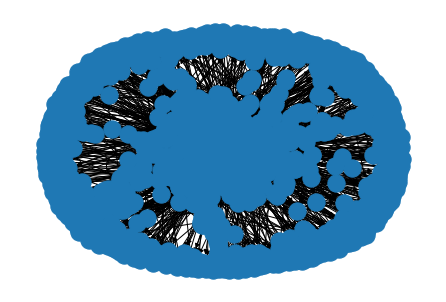

In [49]:
nx.draw(g_consprot)

In [3]:
y = nx.pagerank(g_consprot)
y2 = y.values()

In [4]:
A = nx.stochastic_graph(g_consprot)
T = nx.adjacency_matrix(A).todense()
print(T.shape)
shape = T.shape[0]
v = np.ones(1614)/1614
v



(1614, 1614)


C:\Users\gustavo.arosemena\AppData\Local\Temp\ipykernel_20792\1542196764.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  T = nx.adjacency_matrix(A).todense()


array([0.00061958, 0.00061958, 0.00061958, ..., 0.00061958, 0.00061958,
       0.00061958])

In [6]:
T

matrix([[0.  , 0.25, 0.25, ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        ...,
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [100]:
# for i in range(100):
#     v = T @ (v.reshape(1614,-1) * 0.85)
#     vnorm = np.linalg.norm(v)
#     v = v/vnorm

In [101]:
# for i in range(100):
#     v = T.T @ (v.reshape(1614,-1) + 0.15)
#     vnorm = np.linalg.norm(v)
#     v = v/vnorm

In [102]:
for i in range(100):
    v = T.T @ (v.reshape(shape,-1))
    v = v*0.85
    residual = v*0.15
    mysum = np.sum(residual)
    v = v + 1/shape*mysum
    vnorm = np.linalg.norm(v)
    v = v/vnorm

<AxesSubplot:ylabel='Count'>

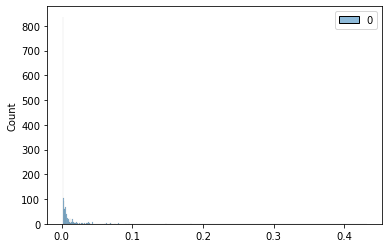

In [103]:
sns.histplot(v)

<AxesSubplot:>

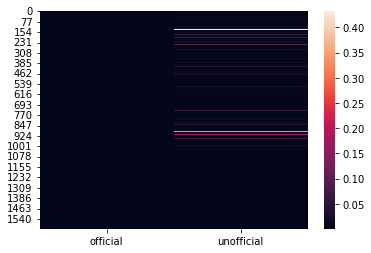

In [106]:
sns.heatmap(testdf)

<AxesSubplot:xlabel='official', ylabel='Density'>

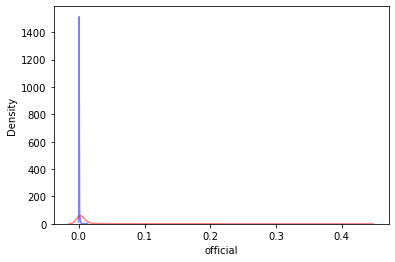

In [107]:
sns.kdeplot(testdf.official, alpha = 0.5, color = "blue")
sns.kdeplot(testdf.unofficial, alpha = 0.5, color= "red")

## Smaller dataset

In [109]:
df_furniture = pd.read_csv('furniturewebsites.csv')
df_furniture['links'] = df_furniture.links.str.split(', ')
df_furniture = df_furniture.explode('links')
g_furniture = nx.DiGraph()
g_furniture.add_nodes_from(df_furniture.webpage)
g_furniture.add_edges_from(zip(df_furniture.webpage, df_furniture.links))


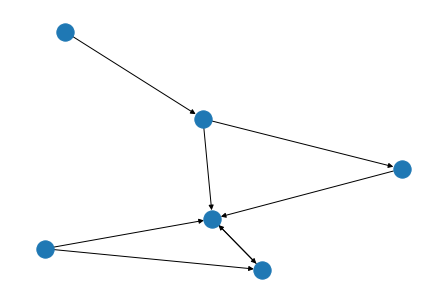

In [110]:
nx.draw(g_furniture)

In [111]:
y = nx.pagerank(g_furniture)
y2 = y.values()

In [120]:
A = nx.stochastic_graph(g_furniture)
T = nx.adjacency_matrix(A).todense()
print(T.shape)

v = np.ones(6)/6
v



(6, 6)


C:\Users\gustavo.arosemena\AppData\Local\Temp\ipykernel_2680\2739676766.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  T = nx.adjacency_matrix(A).todense()


array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

### Stochatisc transition matrix is in the wrong shape, cols sum > 1.

In [113]:
T

matrix([[0. , 0.5, 0. , 0.5, 0. , 0. ],
        [0. , 0. , 0. , 1. , 0. , 0. ],
        [0. , 0. , 0. , 0.5, 0. , 0.5],
        [0. , 0. , 0. , 0. , 0. , 1. ],
        [1. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 1. , 0. , 0. ]])

### so lets remove the transpose

> lets add alpha instead of multipyling it

this starts to get close...


In [121]:
for i in range(100):
    v = T.T @ (v.reshape(6,-1))
    residual = np.sum(v*0.15)
    v = v*0.85
    v = [x+residual/6 for x in v]
    vnorm = np.linalg.norm(v)
    v = v/vnorm

In [122]:
testdf = pd.DataFrame({'official': y2, 
                       "unofficial":np.ravel(v)})
testdf.head(100)

,official,unofficial
0,0.046250,0.075537
1,0.044656,0.072934
2,0.025000,0.040831
3,0.445117,0.726982
4,0.025000,0.040831
5,0.413977,0.676119


<AxesSubplot:>

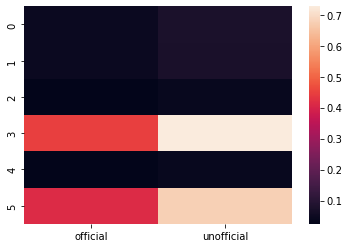

In [123]:
sns.heatmap(testdf)

<AxesSubplot:xlabel='official', ylabel='Density'>

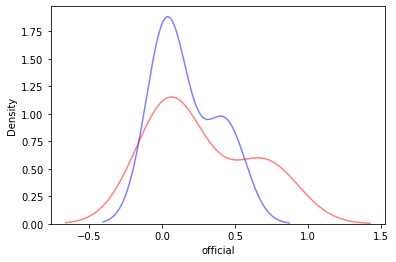

In [124]:
sns.kdeplot(testdf.official, alpha = 0.5, color = "blue")
sns.kdeplot(testdf.unofficial, alpha = 0.5, color= "red")